# 노인 교육

In [13]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요  시니어 교육
추출할 뉴스기사의 숫자를 입력해주세요  1000


,title,url
0,"동서대 시니어운동처방학과-바모스승마클럽, 재활승마지도자 양성에 박차",https://www.asiatoday.co.kr/view.php?key=20220...
1,"동서대 ‘에버그린 에이전시’ 시니어 배우, 비타500 TV 광고 출연",http://news.heraldcorp.com/view.php?ud=2022092...
2,"국립부여박물관, 액티브 시니어 위한 프로그램 운영",http://www.edaily.co.kr/news/newspath.asp?news...
3,"영덕군, '시니어 통합 지원사' 교육 수료자 취업박람회 개최",https://www.jeonmae.co.kr/news/articleView.htm...
4,"[액티브 시니어] ""단지 곳곳 안내판… 치매예방 도와요""",https://www.viva100.com/main/view.php?key=2022...
...,...,...
995,"금감원, 제10기 대학생 금융교육봉사단 모집",http://www.babytimes.co.kr/news/articleView.ht...
996,"금감원, 대학생 금융교육봉사단 150명 모집",http://www.inews24.com/view/1482646
997,"성남시니어산업혁신센터-한국에자이-나우- 한국리빙랩네트워크, 시니어리빙랩...",http://www.kihoilbo.co.kr/news/articleView.htm...
998,전남교육청-한국시니어클럽 전남지회 학교환경관리 협약,http://www.breaknews.com/854313


In [14]:
noin = news_df.copy()

In [15]:
import re
target = noin['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체
#text

In [16]:
noin['title'].unique()

array(['동서대 시니어운동처방학과-바모스승마클럽, 재활승마지도자 양성에 박차',
       '동서대 ‘에버그린 에이전시’ 시니어 배우, 비타500 TV 광고 출연',
       '국립부여박물관, 액티브 시니어 위한 프로그램 운영', "영덕군, '시니어 통합 지원사' 교육 수료자 취업박람회 개최",
       '[액티브 시니어] "단지 곳곳 안내판… 치매예방 도와요"', '대전서부소방서, 중구시니어클럽 소방안전교육',
       '"디지털금융 쉽게 알려드려요"…서울 어르신 대상 교육', '계룡시니어클럽, 27일 노인일자리 미니박람회 개최',
       '[제16회 대한금융 포럼] 시늉뿐인 시니어 금융 우대', "대교, 엠쓰리솔루션과 '디지털 시니어 인지 케어' 협력",
       "'5명중 1명꼴' 시니어 세상 온다…전방위로 확산하는 실버산업 [긱스]",
       "창원대 BK21 뉴시니어 사업단 주최 첫 전시회 '호응'",
       '"돈 뽑을 때는 이렇게 하세요"…BNK경남은행 시니어 자동화기기 교육',
       '시니어와 장애인 골퍼를 위한 골프대회, 서울 PGTA 클래식 성료', '대구 액티브시니어박람회 내달 22일 개최',
       '완주시니어클럽 명절 판매 수익금, 나눔',
       "국립부여박물관, 노인의 날 기념 '액티브 시니어, 인생을 축제처럼 즐기다' 교...",
       '청주 강내농협, 시니어아카데미 효도 나들이', "[B tv 대구뉴스]'소통과 휴식의 공간' 남구시니어행복센터 개소",
       "창원대 BK21 뉴시니어 사업단, 첫 전시회 관람객 '호응'",
       '청주 강내농협, 시니어아카데미 효도 나들이 ‘신바람’', '청주 강내농협, 시니어아카데미 효도 나들이 ‘눈길’',
       "'시니어 스마트 데이', 마을 단위에서 이뤄지는 전국적 스마트폰 교육 캠페인",
       '전주시, 시니어 금융복지상담가 양성', '[액티브 시니어] 스마트뱅킹·키오스크 은행업무 함께 배워요',
  

In [31]:
pd.set_option('display.max_row', 1000)

In [32]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = [


]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
시니어,778
교육,456
모델,130
디지털,111
실시,83
...,...
미션,1
린지,1
나우,1
국토,1


In [33]:
df[:1000]

,cnt
시니어,778
교육,456
모델,130
디지털,111
실시,83
노인,81
어르신,80
클럽,77
금융,76
평생교육,72


In [35]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =['메타버스','메타버스','메타버스','메타버스','메타버스','메타버스','메타버스','메타버스','메타버스','메타버스','키오스크','키오스크','키오스크','키오스크','리터러시','리터러시','리터러시','리터러시',]
stop_word = [
'디지털',
'평생교육',
'스마트폰',
'일자리',
'사업',
'양성',
'인생',
'사회',
'미래',
'케어',
'문화',
'발전',
'활동',
'업무',
'스마트',
'개발',
'안전교육',
'바리스타',
'체험',
'전문가',
'치매',
'은퇴',
'예술',
'취업',
'복지',
'포토',
'정보화',
'직업',
'은행',
'미디어',
'건강',
'도전',
'행복',
'직무',
'창업',
'인력',
'여행',
'봉사',
'운동',
'노후',
'크리에이터',
'배우',
'온라인',
'요양',
'농촌',
'유아',
'패션모델',
'사기',
'도서',
'기업',
'격차',
'해소',
'역량',
'준비',
'개선',
'영상',
'힐링',
'퇴직',
'영어',
'지능',
'튜터',
'극단',
'스트레스',
'드론',
'수영',
'기술',
'독서',
'어플',
'글자',
'소통',
'대화',
'연극',
'화재',
'주택',
'스타트업',
'공부',
'스포츠',
'인문',
'교양',
'클래식',
'취직',
'교류',
'사이버',
'아트',
'도서',
'지혜',
'자기계발',
'보이스피싱',
'취미',
'그리기',
'미술',
'지도자',
'모바일',
'테크',
'창작',
'공감',
'응급',
'화원'
]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
디지털,111
평생교육,72
스마트폰,64
일자리,62
사업,62
양성,44
인생,37
사회,34
미래,28
케어,27


In [140]:
df.index.to_list()

['일자리',
 '소방',
 '안전',
 '치매',
 '건강',
 '사회',
 '디지털',
 '독거',
 '문화',
 '금융',
 '교통',
 '평생교육',
 '역량',
 '인권',
 '양성',
 '인력',
 '소양',
 '키오스크',
 '성교육',
 '여가',
 '스마트폰',
 '예술',
 '의료',
 '공예',
 '회계',
 '정신건강',
 '역사',
 '만들기',
 '환경',
 '재무',
 '농업',
 '보이스피싱',
 '식생활',
 '취업',
 '간호',
 '심리',
 '실생활',
 '포토',
 '미디어',
 '푸드',
 '테크',
 '글로벌',
 '기술',
 '우울증',
 '대화',
 '기초과학',
 '취미',
 '주문',
 '반찬',
 '영화관',
 '힐링',
 '식단',
 '농기',
 '가정',
 '재활',
 '커피',
 '운동',
 '고혈압',
 '당뇨병',
 '지능',
 '말동무',
 '자영업자',
 '휴머니튜드',
 '전문교육',
 '요리',
 '응급처치',
 '말벗',
 '장비',
 '목공',
 '노래',
 '축산물',
 '포장',
 '반려동물',
 '도시농업',
 '학업',
 '가르침',
 '지식',
 '인간관계',
 '치료',
 '식사',
 '농촌',
 '농장',
 '식중독',
 '은퇴',
 '생활고',
 '일터',
 '알바',
 '로봇',
 '외국어',
 '트롯',
 '체육',
 '재배',
 '극단',
 '수영',
 '골프',
 '피아노',
 '상담',
 '플랫폼',
 '소통',
 '예약',
 '도시락',
 '빨래',
 '옥천군',
 '시화',
 '전서',
 '최기문',
 '영천시장',
 '시사회',
 '생수',
 '충북도',
 '게재',
 '교육자',
 '동서',
 '중립',
 '신현원창동',
 '강의',
 '불교',
 '정관',
 '주체',
 '기여',
 '이모저모',
 '대한의사협회',
 '창울',
 '이도영',
 '목포시',
 '차단',
 '이천',
 '부원',
 '방법',
 '부산시',
 '제주시',
 '마산',
 '일자',


In [124]:
df[:500]

,cnt
일자리,120
소방,52
안전,47
치매,46
건강,42
사회,40
디지털,31
독거,29
문화,29
금융,29


In [141]:
df.cnt.unique()

array([120,  52,  47,  46,  42,  40,  31,  29,  27,  24,  23,  22,  17,
        16,  14,  13,  11,  10,   9,   8,   7,   6,   5,   4,   2,   1])

In [113]:
df_test= df[df['cnt'] > 10]  #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기
len(df_test)

21

In [114]:
df_stop_words = df_test
df_stop_words = df_stop_words.reset_index()
df_stop_words

,index,cnt
0,일자리,120
1,소방,52
2,안전,47
3,치매,46
4,건강,42
5,사회,40
6,디지털,31
7,독거,29
8,문화,29
9,금융,29


In [36]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')# 한글 폰트 설정

(-0.5, 2999.5, 3999.5, -0.5)

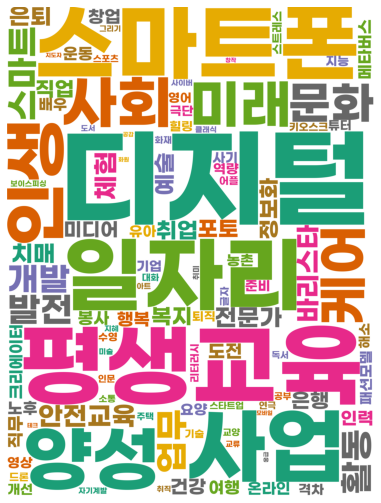

In [39]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 3000, 
                      height = 4000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=100).generate_from_frequencies(data)
plt.figure(figsize = (9, 9))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기